# Alucar - Analisando as Vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('dados/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('dados/alucar.csv')

In [4]:
alucar.shape

(24, 2)

In [5]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [6]:
alucar.count()

mes       24
vendas    24
dtype: int64

In [7]:
print('Quantidade de dados nulos: ', alucar.isna().sum())

Quantidade de dados nulos:  mes       0
vendas    0
dtype: int64


In [8]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [9]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [10]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [11]:
import seaborn as sns

In [12]:
print(sns.__version__)

0.11.1


In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

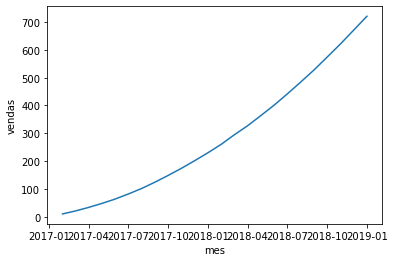

In [14]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

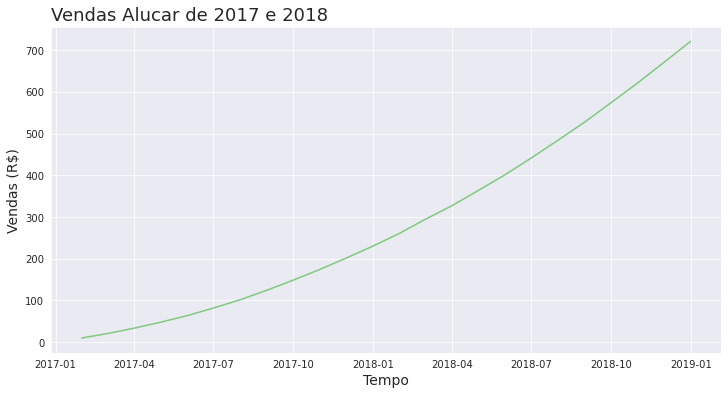

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [16]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [17]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


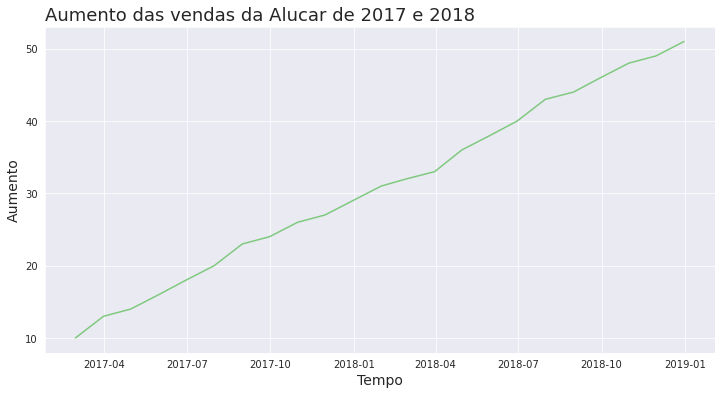

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [19]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

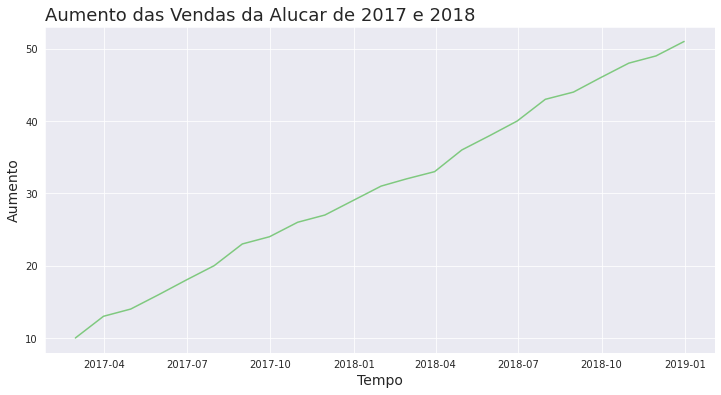

In [20]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
      'mes', 'aumento', alucar)

In [21]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


In [22]:
alucar.aceleracao

0     NaN
1     NaN
2     3.0
3     1.0
4     2.0
5     2.0
6     2.0
7     3.0
8     1.0
9     2.0
10    1.0
11    2.0
12    2.0
13    1.0
14    1.0
15    3.0
16    2.0
17    2.0
18    3.0
19    1.0
20    2.0
21    2.0
22    1.0
23    2.0
Name: aceleracao, dtype: float64

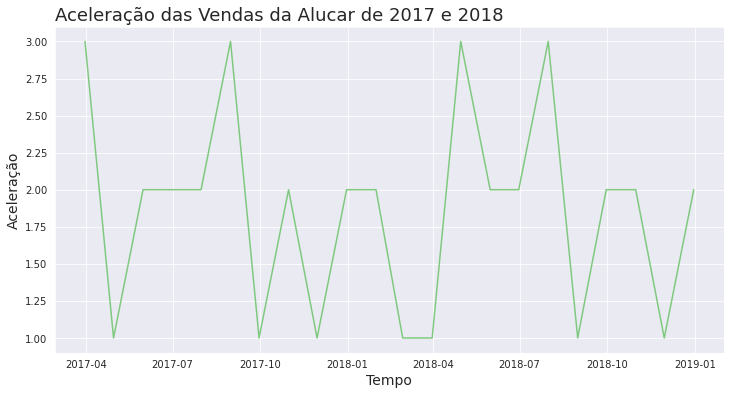

In [23]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

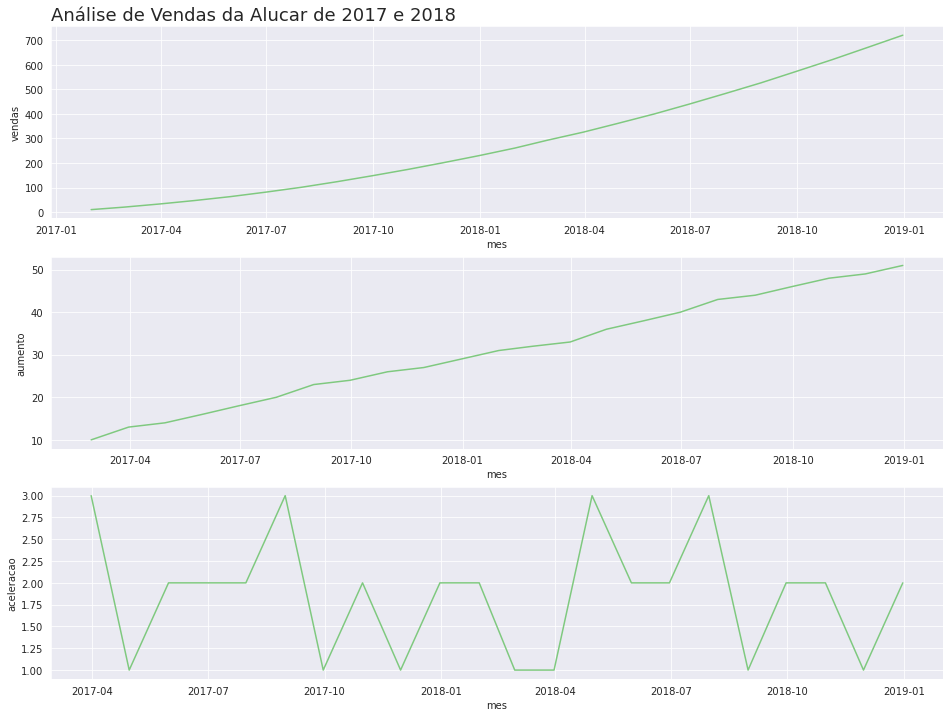

In [24]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [25]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

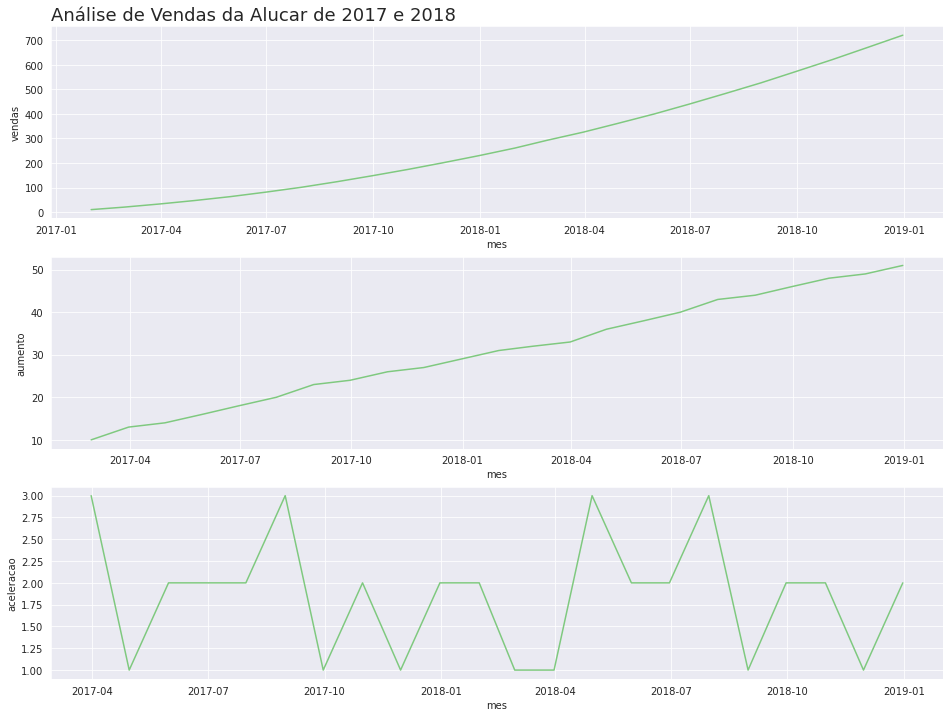

In [26]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas da Alucar de 2017 e 2018')

In [27]:
from pandas.plotting import autocorrelation_plot

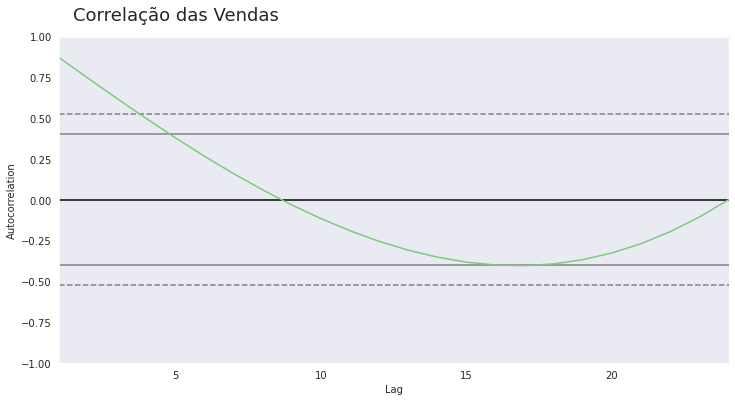

In [28]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

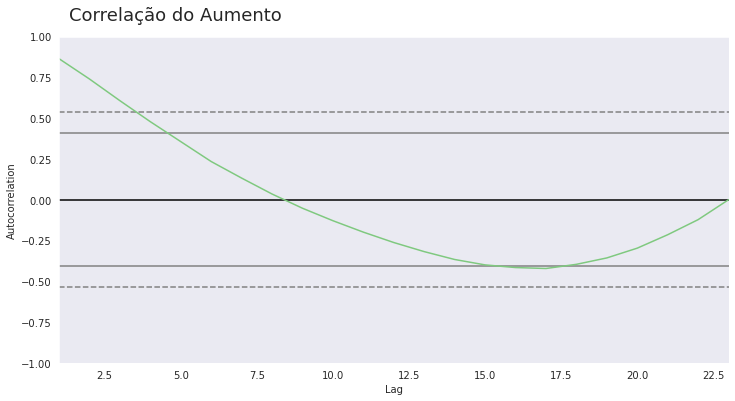

In [29]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

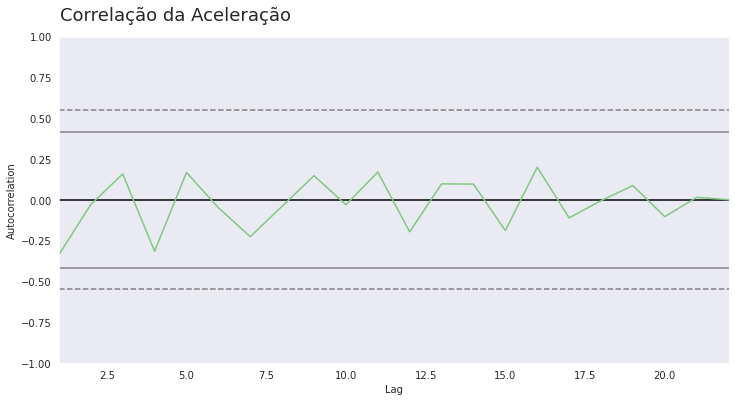

In [30]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da Newsletter

In [31]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [32]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [33]:
print('A quantidade de linhas e colunas:', assinantes.shape)
print('A quantidade de dados nulos:', assinantes.isna().sum().sum())

A quantidade de linhas e colunas: (24, 2)
A quantidade de dados nulos: 0


In [34]:
assinantes.mes = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [35]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


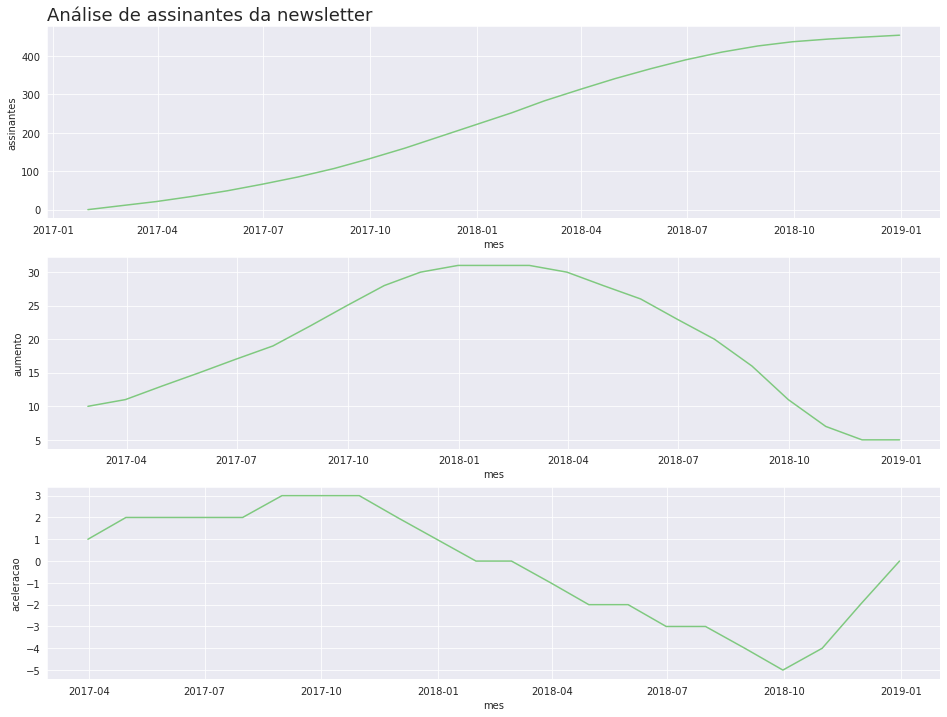

In [36]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',
                assinantes, 'Análise de assinantes da newsletter')

## Chocolura - Analisando as Vendas

In [37]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [38]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [39]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [40]:
print('Quantidade de linhas:', chocolura.shape[0])
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: 24
Quantidade de dados nulos: 0


In [41]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [42]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

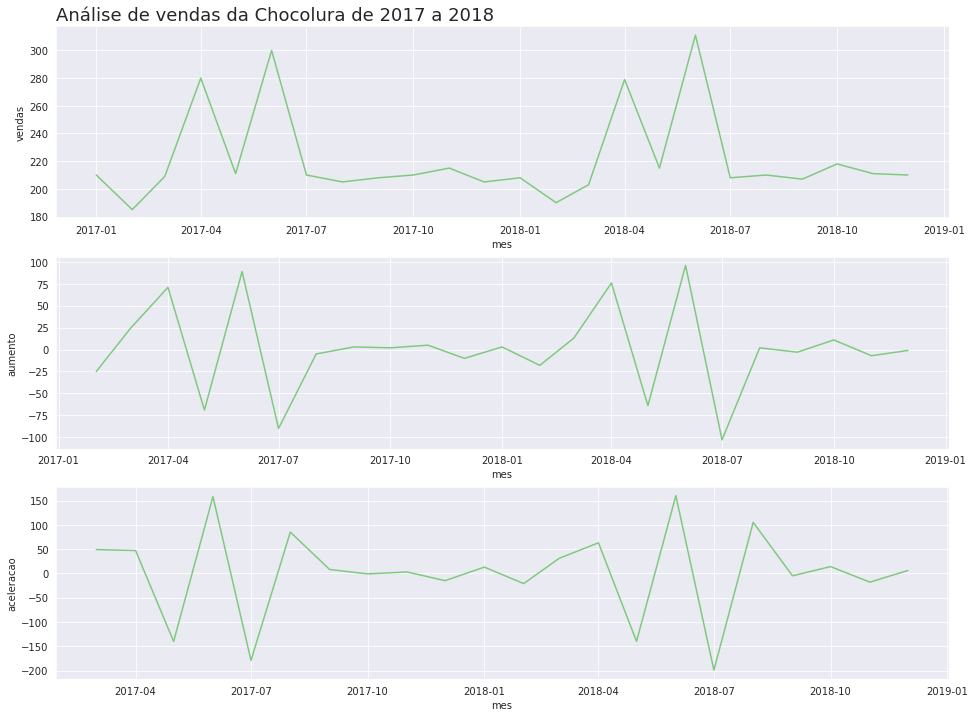

In [43]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 
                'Análise de vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas diárias(Outrubro e Novembro)

In [44]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [45]:
print('Quantidade de registros:', vendas_por_dia.shape[0])
print('Quantidade de dados nulo:', vendas_por_dia.isna().sum().sum())

Quantidade de registros: 61
Quantidade de dados nulo: 0


In [46]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [47]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [48]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [49]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia.head()

,dia,vendas,aumento
0,2018-10-01,50,NaN
1,2018-10-02,48,-2.0
2,2018-10-03,56,8.0
3,2018-10-04,50,-6.0
4,2018-10-05,51,1.0


In [50]:
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

In [51]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


In [52]:
?plot_comparacao

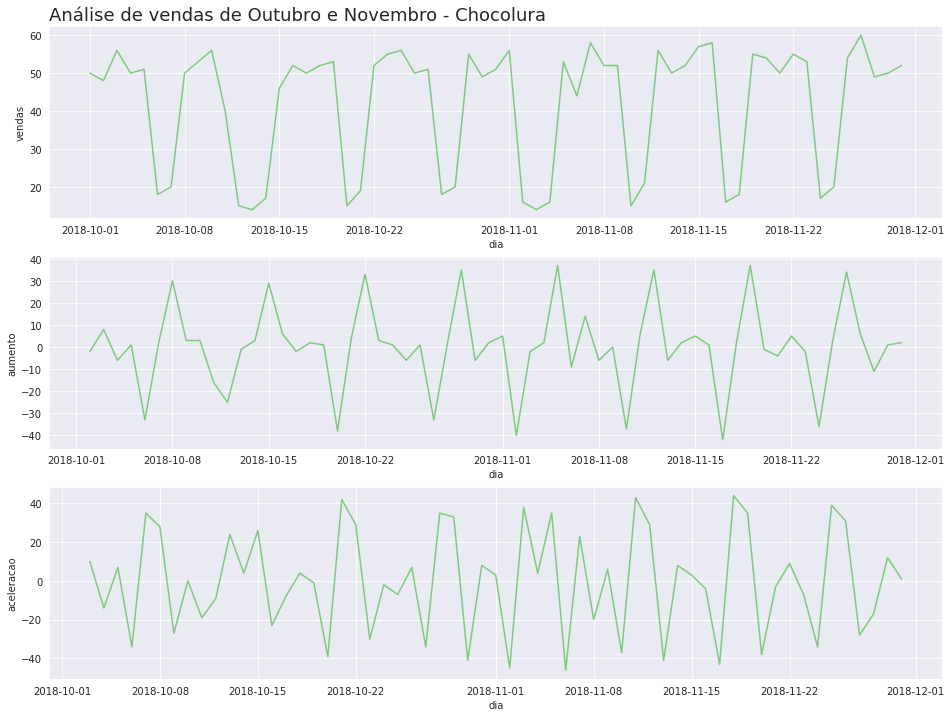

In [53]:
plot_comparacao(
    x = 'dia', 
    y1 = 'vendas', 
    y2 = 'aumento', 
    y3 = 'aceleracao', 
    dataset = vendas_por_dia,
    titulo = 'Análise de vendas de Outubro e Novembro - Chocolura'
)

**Analisando a Sazonalidade**

In [54]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


In [55]:
vendas_por_dia['dia'] = vendas_por_dia['dia'].dt.day_name()

In [56]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao
0,Monday,50,NaN,NaN
1,Tuesday,48,-2.0,NaN
2,Wednesday,56,8.0,10.0
3,Thursday,50,-6.0,-14.0
4,Friday,51,1.0,7.0
5,Saturday,18,-33.0,-34.0
6,Sunday,20,2.0,35.0


In [57]:
vendas_por_dia['dia'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [58]:
dia_traduzido = {
    'Monday': 'Segunda', 
    'Tuesday': 'Terca',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta', 
    'Friday': 'Sexta', 
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

In [59]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].map(dia_traduzido)

In [60]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,Monday,50,NaN,NaN,Segunda
1,Tuesday,48,-2.0,NaN,Terca
2,Wednesday,56,8.0,10.0,Quarta
3,Thursday,50,-6.0,-14.0,Quinta
4,Friday,51,1.0,7.0,Sexta
5,Saturday,18,-33.0,-34.0,Sabado
6,Sunday,20,2.0,35.0,Domingo
7,Monday,50,30.0,28.0,Segunda
8,Tuesday,53,3.0,-27.0,Terca
9,Wednesday,56,3.0,0.0,Quarta


# Agrupando os dias

In [61]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-61-38016381f919>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [62]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

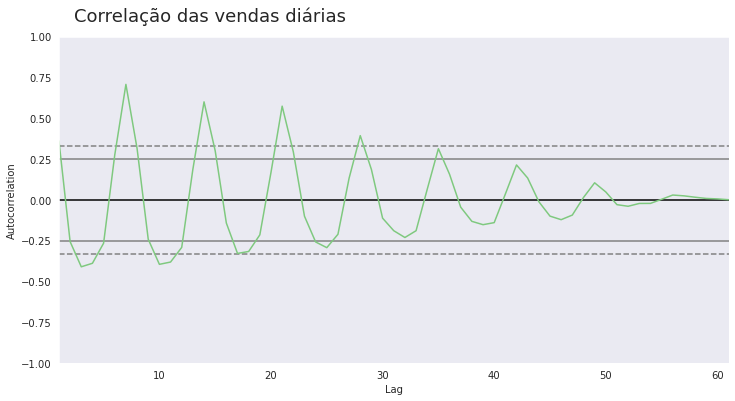

In [63]:
# Verificando se os valores de vendas, aumento e aceleração estarão correlacionados.
# Primeiro com vendas.
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

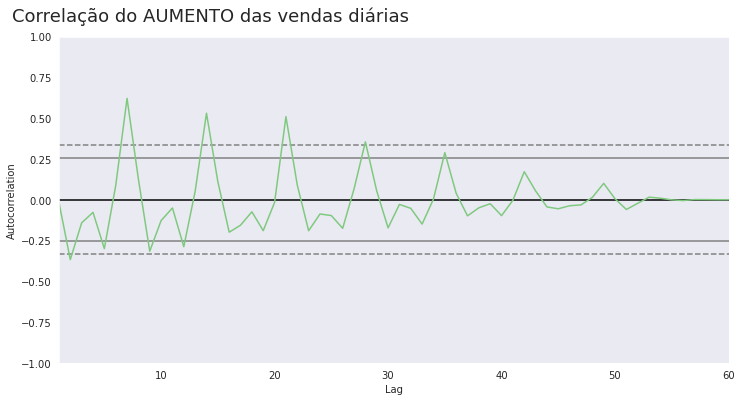

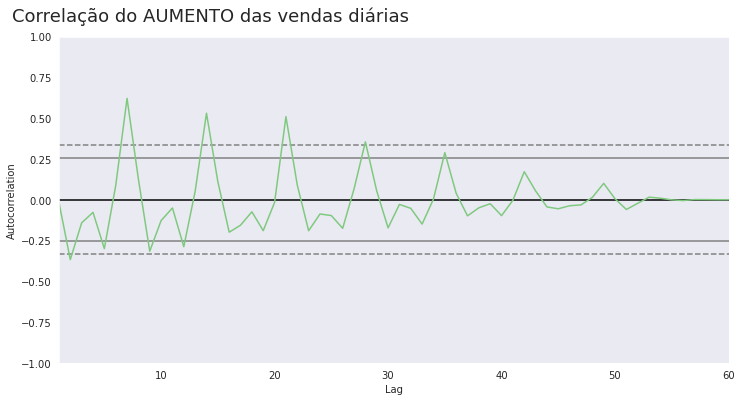

In [64]:
# Verificando se os valores de vendas, aumento e aceleração estarão correlacionados.
# Segundo com o aumento, começando do índice 1.
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do AUMENTO das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax

In [65]:
vendas_por_dia

,dia,vendas,aumento,aceleracao,dia_da_semana
0,Monday,50,NaN,NaN,Segunda
1,Tuesday,48,-2.0,NaN,Terca
2,Wednesday,56,8.0,10.0,Quarta
3,Thursday,50,-6.0,-14.0,Quinta
4,Friday,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,Monday,54,34.0,31.0,Segunda
57,Tuesday,60,6.0,-28.0,Terca
58,Wednesday,49,-11.0,-17.0,Quarta
59,Thursday,50,1.0,12.0,Quinta


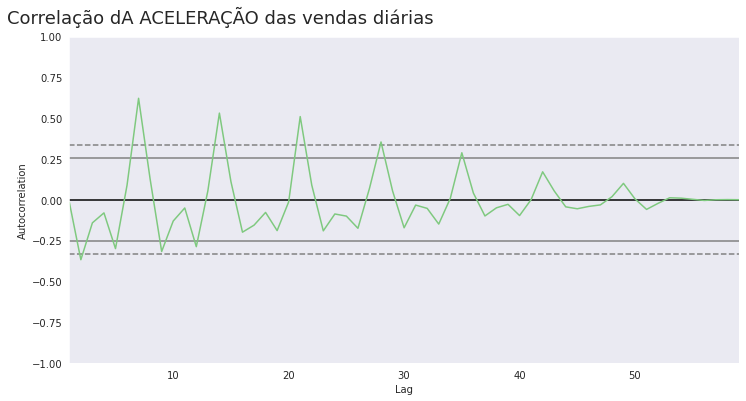

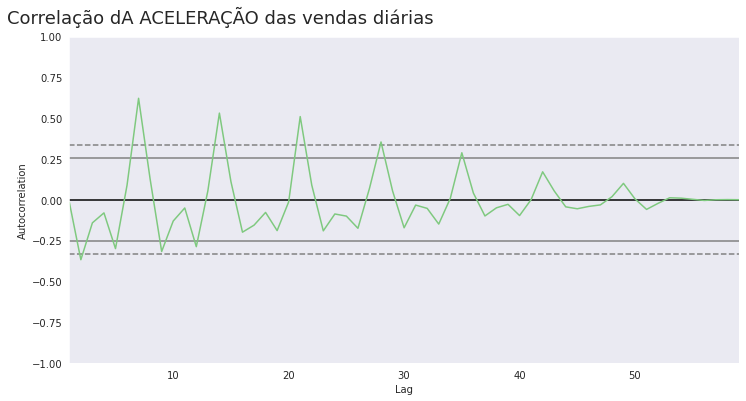

In [66]:
# Gerando o gráfico de correlação referente à aceleração.
# Os dois primeiros valores da aceleração são NaN, logo começaremos da posição dois
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação dA ACELERAÇÃO das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][2:])
ax

A correlação existe, porém ela é um pouco menor que nos exemplos acima. O gráfico ultrapassa positivamente a faixa de significância algumas venzes, antes de cair e ficar nula.

Logo, existe de fato uma correlação entre o valor das vendas, do aumento, e da aceleração das vendas diárias.

# Cafelura - Ánalise de vendas

In [67]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


Análisando inicialmente a base de dados, nota que os dados são registrados no período de 2 anos

In [68]:
# Conferindo os tipos do nosso dataframe
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [69]:
# Transformando a variável mês de object para datetime, pois estamos trabalhando com o tempo
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [70]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


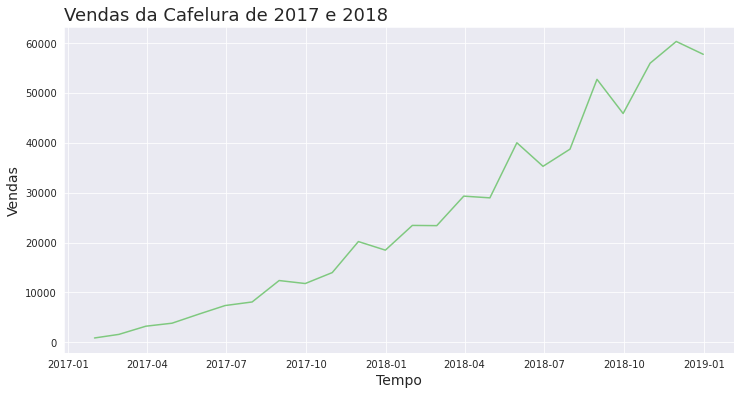

In [71]:
# Plotando o gráfico de vendas da Cafelura de 2017 e 2018. plotar(titulo, labelx, labely, x, y, dataset)
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

O gráfico mostra que a empresa está em crescimento, porém, nota-se que em alguns meses as vendas parecem ter aumentado muito, precisamos conferir para ver se poderemos normalizar o gráfico.

In [72]:
# Para normalizar o gráfico, pegaremos o arquivo "dias_final_de_semana.csv" que contém os dias de finais de semana
# dos anos de 2017 e 2018.
quantidade_dias_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [73]:
# Pegando os valores da coluna "quantidade_de_dias" e passando para dentro de um array.
quantidade_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [74]:
# Agora que temos os valores dos dias de finais de semana, dividiremos as vendas pelos dias de finais de semana.
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_dias_fds['quantidade_de_dias']
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


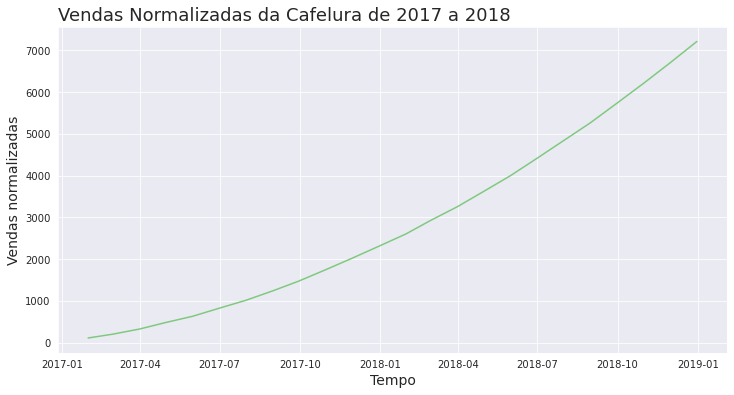

In [75]:
# Plot das vendas normalizadas. plotar(titulo, labelx, labely, x, y, dataset)
plotar(
    'Vendas Normalizadas da Cafelura de 2017 a 2018', 
    'Tempo', 
    'Vendas normalizadas',
    'mes', 
    'vendas_normalizadas',
    cafelura
)

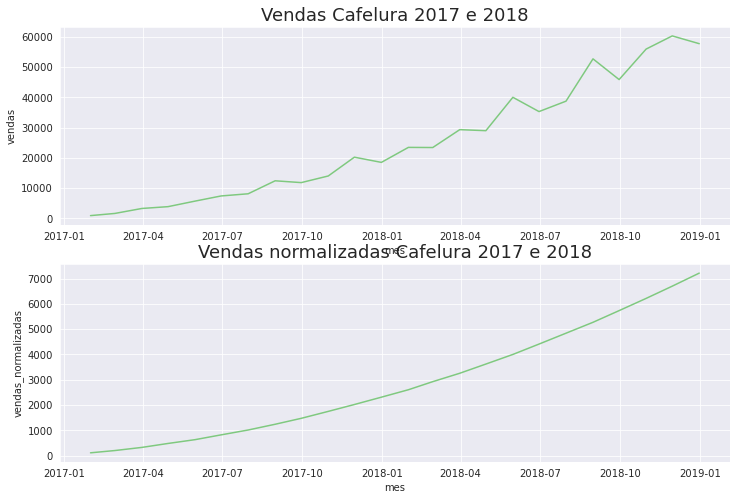

In [76]:
# Plotando dois gráficos para fazermos uma comparação entre eles.
plt.figure(figsize=(12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

Então teremos as duas formas das vendas apresentadas nos gráficos, tanto as vendas quanto as vendas normalizadas de acordo com a quantidade de dias de finais de semana.

# Statsmodels

In [77]:
# Essa biblioteca nos mostra a tendência, sasonalidade e os ruídos.
from statsmodels.tsa.seasonal import seasonal_decompose

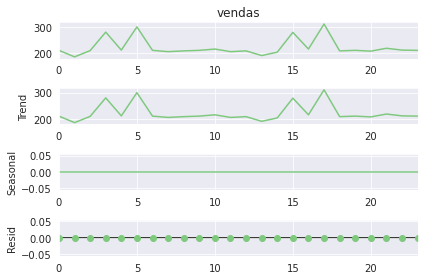

In [78]:
# Frequência 1.
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()

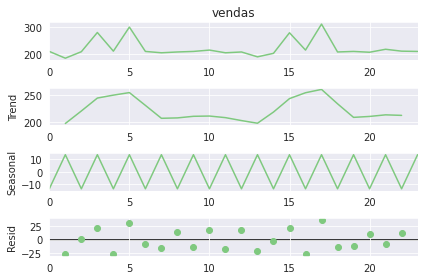

In [79]:
# Frequência 2.
resultado = seasonal_decompose(chocolura['vendas'], period=2)
ax = resultado.plot()

Nossa observação é a mesma, porém, nossa tendência mudou, nossa sazionalidade segue um padrão e temos bastante ruído.

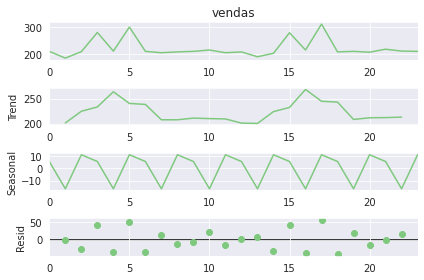

In [80]:
# Frequência 3.
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

Com a frequência 3, teremos o crescimento no ponto da observação. Na tendência, o valor aumentará, cairá, depois aumentará e cairá de novo. A sazonalidade segue o padrão e o ruído não traz o início. Isso indica que começamos a perder referência conforme o nível de frequência que colocamos.

In [81]:
# Frequência 10.
# resultado = seasonal_decompose(chocolura['vendas'], period=10)
# ax = resultado.plot()

> Com o period=10 não conseguiremos mais ver os dados da tendência nem do ruído e a sazonalidade ficará semelhante à própria observação apesar de distorções do gráfico.

In [82]:
# Salvando os estados da observação, tendência, sazonalidade e ruído.
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [83]:
# Criando um Dataframe com todos os valores acima.
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


In [84]:
resultado.index

RangeIndex(start=0, stop=24, step=1)

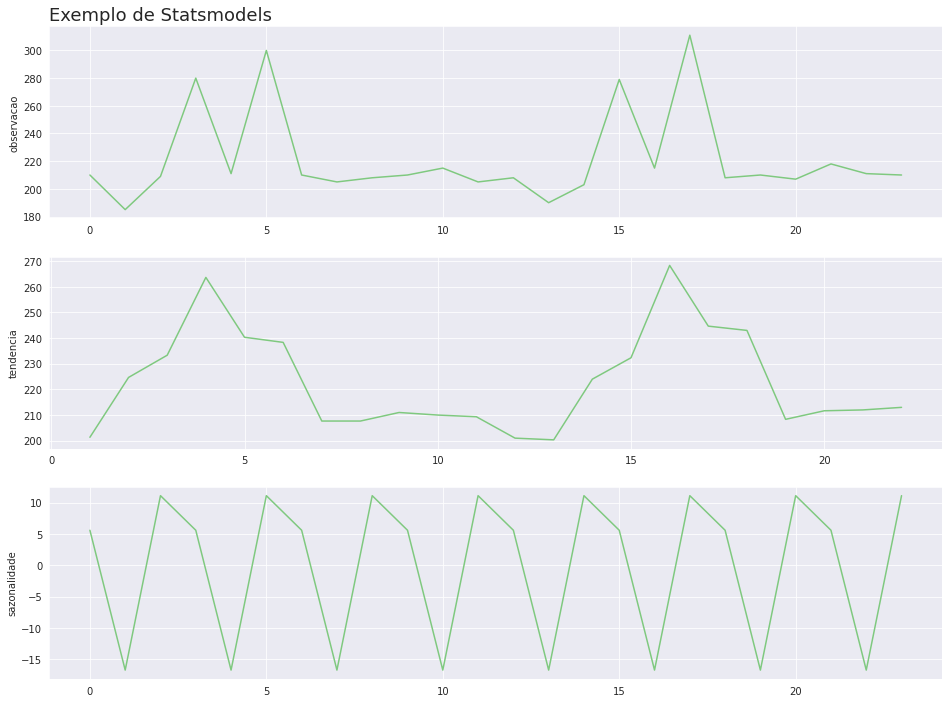

In [85]:
# Plot comparacao - plot_comparacao(x, y1, y2, y3, dataset, titulo):
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

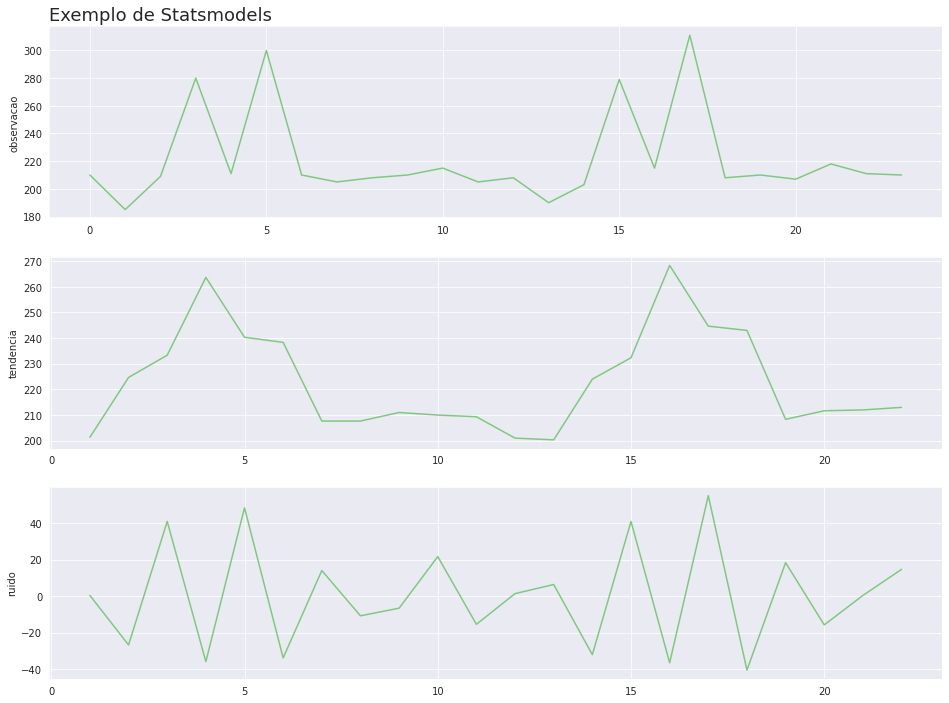

In [86]:
# Plot comparacao - trocando sazonalidade por ruido.
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de Vendas

In [87]:
# Importando os dados
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [88]:
# Conferindo a tipagem dos dados
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [89]:
# Alterando o tipo da coluna dia para datetime
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [94]:
# Verificando se há dados nulos e a quantidade de linhas e colunas
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [96]:
# Visualizando
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [97]:
# Utilizando o diff() para comparar o aumento e a aceleração
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [98]:
# Visualizando
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


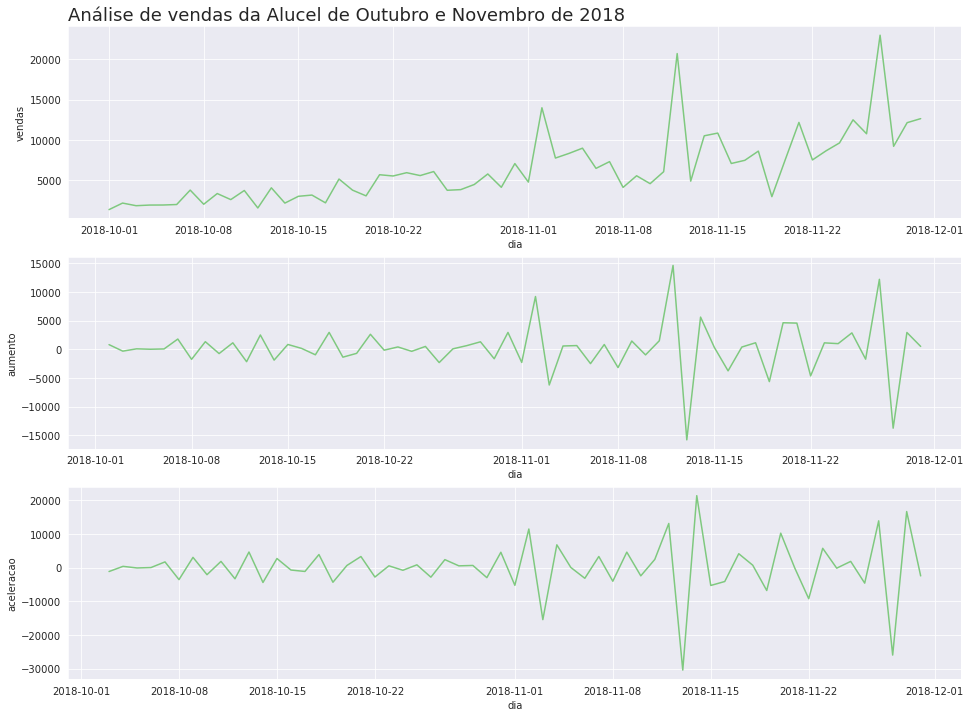

In [99]:
# Plotando o gráfico
plot_comparacao(
    'dia', 
    'vendas', 
    'aumento', 
    'aceleracao', 
    alucel, 
    'Análise de vendas da Alucel de Outubro e Novembro de 2018'
)

> Nota-se que o gráfico apresenta muito ruído. Os gráficos de aumento e aceleração apresentam dados bastante lineares, porém, existe uma queda grande pouco antes do dia 15, precisamos analisar essa queda. Depois, é calculada a média de mais 7 dias, e os pontos serão marcados para minizar a dispersão da frequência.

## A pergunta que nos foi feita quando recebemos esses dados foi se a empresa continuará crescendo e tendo boas vendas ou não.

> Para a redução desses ruídos vou utilizar uma técnica que se chama Média Móvel.
> A ideia é tentar minimizar os ruídos de uma série temporal através de médias móveis, pegando dois ou mais pontos e calculando uma média de 7 dias entre eles.

**Média Móvel**

In [100]:
# Criando uma coluna e aplicando a média móvel em 7 dias, em seguida chamarei o método mean() para calcular a média
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [102]:
# Visualizando o grafico até 7 registros
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


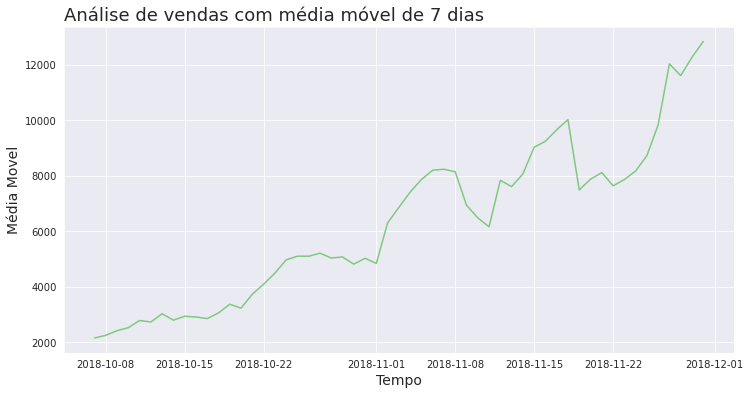

In [103]:
# Plotando o gráfico
plotar(
    'Análise de vendas com média móvel de 7 dias', 
    'Tempo',
    'Média Movel',
    'dia',
    'media_movel', 
    alucel
)

In [106]:
# Média móvel no período de 21 dias
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

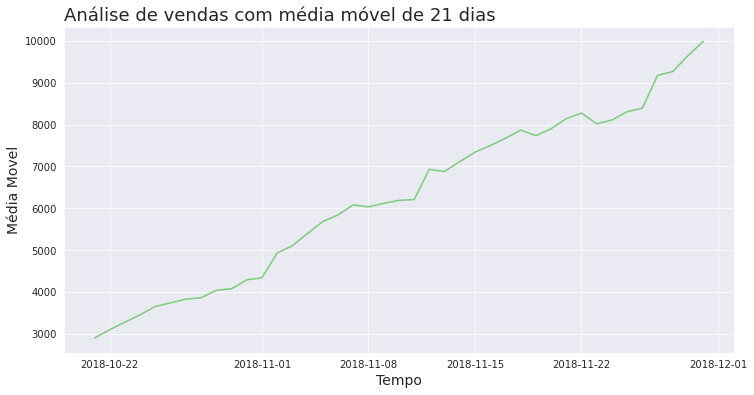

In [107]:
# Plotando o gráfico
plotar(
    'Análise de vendas com média móvel de 21 dias', 
    'Tempo',
    'Média Movel',
    'dia',
    'media_movel_21', 
    alucel
)

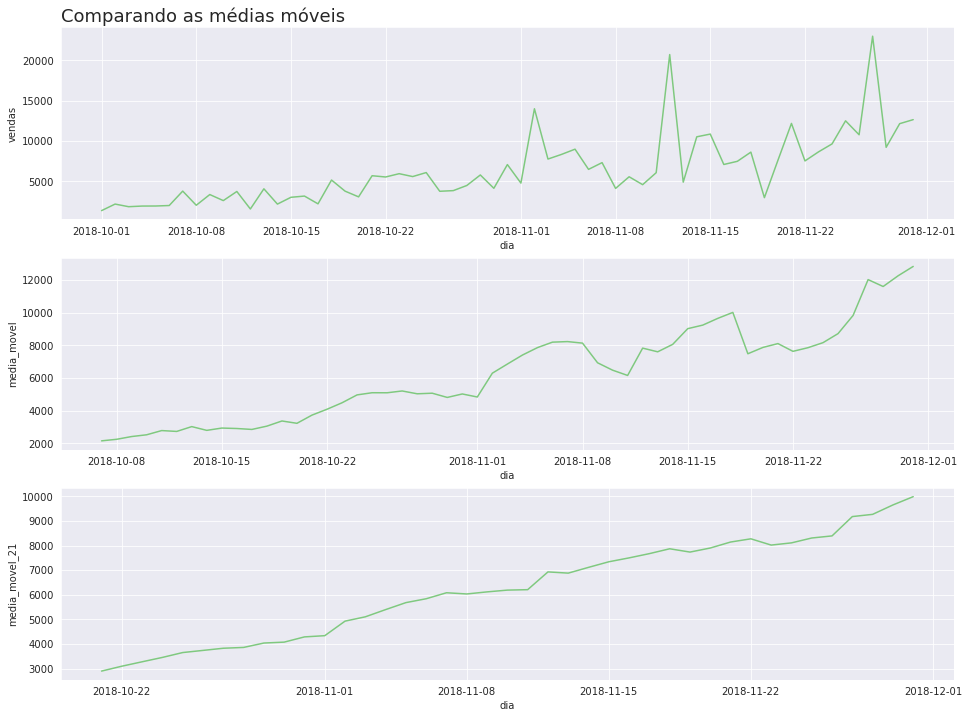

In [108]:
# Plotando os gráficos para comparação
plot_comparacao(
    'dia',
    'vendas',
    'media_movel',
    'media_movel_21',
    alucel,
    'Comparando as médias móveis'
)

> Os três escrevem as mesmas informações sobre as vendas da empresa, com a diferença da normalização que ocorre de forma mais suave na Média Móvel de 7 dias e mais intensificada na de 21 dias. Mesmo na média de 21 dias vemos que houve uma queda marcada.

# Final da análise